<a href="https://colab.research.google.com/github/masatt/covid19_osaka/blob/master/covid_osaka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#try:
#    from google.colab import files
#    print('installing the japanize_matplotlib to google colab')
#    !pip install japanize_matplotlib
#    import japanize_matplotlib
#except:
#    print('not on colaboratory. using the local Japanese setting')
#!pip install japanize_matplotlib
#IPAexフォント導入済み

In [2]:
URL = 'https://covid19-osaka.info/data/summary.csv'
df = pd.read_csv(URL, encoding='cp932')
df.columns

Index(['日付', '検査件数', '陽性人数', '陽性累計', '現在陽性者数', '退院', '退院済累計', '退院判明', '退院判明累計',
       '死亡', 'リンク不明者'],
      dtype='object')

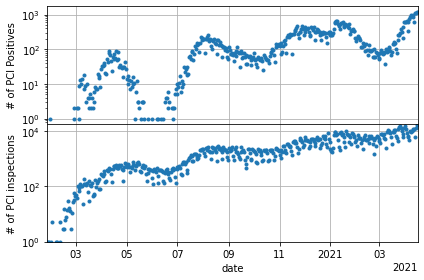

In [6]:
import matplotlib.dates as mdates
import pandas as pd

df0 = pd.read_csv(URL, parse_dates=['日付'], encoding='cp932')
df = df0[['日付', '陽性人数']]
x, y = df.values.T.tolist()

fig = plt.figure()
ax1 = plt.subplot(211)

locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
formatter.formats=['%Y', '%m', '%d', '%H:%M', '%H:%M', '%S.%f']
formatter.zero_formats=['', '%Y', '%m', '%m-%d', '%H:%M', '%H:%M']
formatter.offset_formats=['', '%Y', '%Y-%m', '%Y-%m-%d',
                          '%Y-%m-%d', '%Y-%m-%d %H:%M']
ax1.xaxis.set_major_formatter(formatter)

ax1.plot(x, y, '.')
#ax1.set_ylabel(df.columns[1])
ax1.set_ylabel('# of PCI Positives')
ax1.set_yscale('log')
ax1.grid()

ax2 = plt.subplot(212, sharex=ax1, xmargin=0, ymargin=0)
df = df0[['日付', '検査件数']]
x, y = df.values.T.tolist()
ax2.xaxis.set_major_formatter(formatter)

ax2.plot(x, y, '.')
#ax2.set_xlabel(df.columns[0])
ax2.set_xlabel('date')
#ax2.set_ylabel(df.columns[1])
ax2.set_ylabel('# of PCI inspections')
ax2.set_yscale('log')
ax2.grid()

plt.tight_layout()
fig.subplots_adjust(hspace=0)

plt.show()